In [38]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# fc = fsru capacity
# fs = fsru sendout
# fm = fsru min
fc = 174e3
fs = 1097
fm = 3300


# lc = lngc capacity
# ls = lngc sendout
lc = 170e3
ls = 1e4

class oppy(object):
    def __init__(self, fc, fs, fm, lc, ls, env):
        self.fc = fc
        self.fs = fs
        self.fm = fm
        self.lc = lc
        self.ls = ls

        # time to empty for fsru
        self.ftte = fc/fs
        # lngc time to empty
        self.ltte = lc/ls

        self.f_lvl = [fc] # the level of the fsru

        self.optim = self.fc - self.lc + (self.fs*self.ltte)
        
        # not sure if this needed
        fsru_conn = simpy.Resource(env, 1)
        fsru_tank = simpy.Container(env, self.fc, init = self.fc)

        # set the env
        self.env = env
        # Start the run process everytime an instance is created.
        self.action = env.process(self.fsru(fsru_tank))

    
    def fsru(self, tank):
        while True:

            # check if we can perform a filling operation
            fill = self.fill_check(env)

            # sendout
            new_dat = self.f_lvl[-1]
            new_dat -= self.fs

            if fill:
                add_val = self.fill(env, new_dat)
                # add in some lng after we've sent some out
                new_dat += add_val
            
            # truncate the min level
            if new_dat < self.fm:
                new_dat = self.fm

            self.f_lvl.append(new_dat)

            yield self.env.timeout(1)
    
    def lngc(self, env):
        while True:
            print("hello")

    def fill_check(self, env):
        return self.f_lvl[-1] <= self.optim

    def fill(self, env, lvl):
        return self.ls

In [43]:
env = simpy.Environment()
op = oppy(fc, fs, fm, lc, ls, env)
env.run(until = 200)

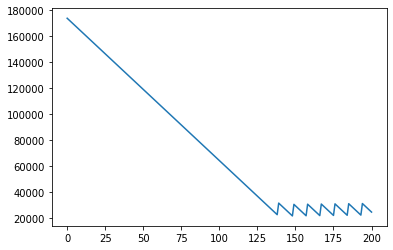

In [44]:
plt.plot(op.f_lvl)